# Importando bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums

In [2]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Traduzindo o dataset

In [3]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [4]:
traducao = {'total_bill': 'Conta', 'tip': 'Gorjeta', 'dessert': 'Sobremesa', 'day': 'Dia'
            , 'time': 'Hora', 'size': 'Ocupantes'}

In [5]:
dados.dessert.unique()

array(['No', 'Yes'], dtype=object)

In [6]:
desert = {'No': 'Não', 'Yes': 'Sim'}

In [7]:
dados.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [8]:
dia = {'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur': 'Quinta', 'Fri': 'Sexta'}

In [9]:
dados.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [10]:
hora = {'Dinner': 'Jantar', 'Lunch': 'Almoço'}

In [11]:
dados.rename(columns=traducao, inplace=True)
dados.Sobremesa = dados.Sobremesa.map(desert)
dados.Dia = dados.Dia.map(dia)
dados.Hora = dados.Hora.map(hora)

In [12]:
dados

,Conta,Gorjeta,Sobremesa,Dia,Hora,Ocupantes
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


## Análise da conta e gorjeta

In [13]:
print(f'A quantidade de dados no dataset é de {dados.shape[0]}')
print('A quantidade de dados não nulos é: ')
dados.count()

A quantidade de dados no dataset é de 244
A quantidade de dados não nulos é: 


Conta        244
Gorjeta      244
Sobremesa    244
Dia          244
Hora         244
Ocupantes    244
dtype: int64

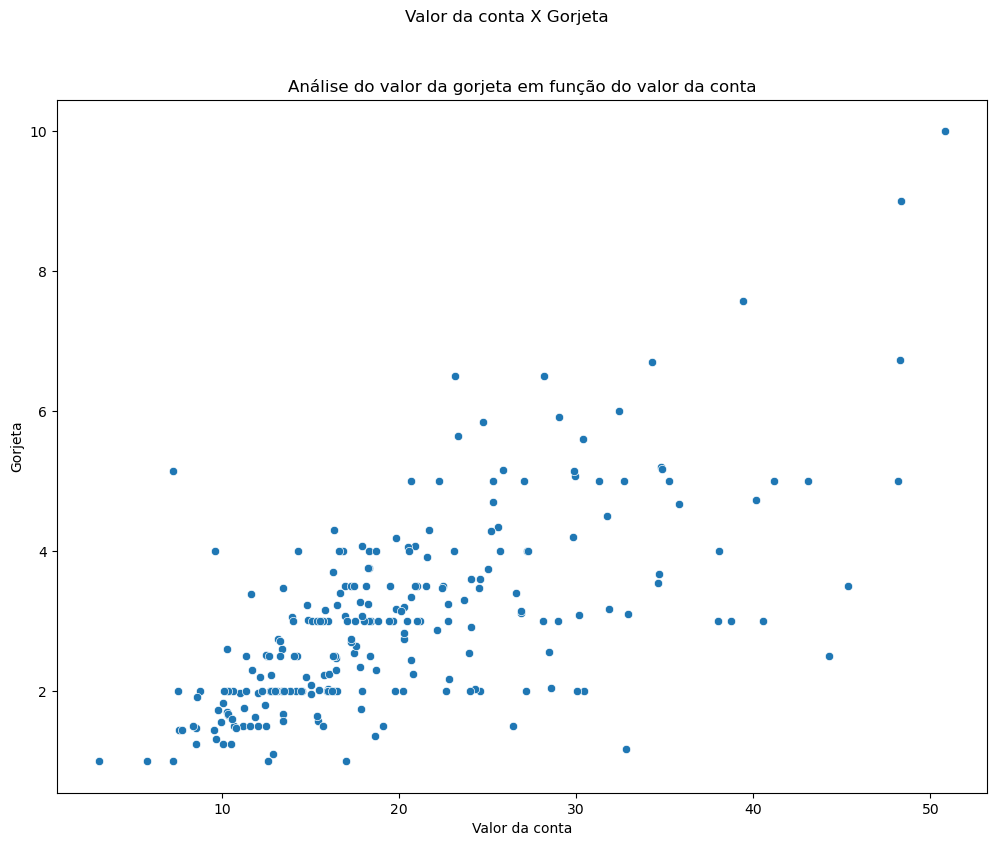

In [14]:
valor_gorjeta = sns.scatterplot(x='Conta', y='Gorjeta', data=dados)
valor_gorjeta.figure.suptitle('Valor da conta X Gorjeta')
valor_gorjeta.set_title('Análise do valor da gorjeta em função do valor da conta')
valor_gorjeta.set(xlabel='Valor da conta', ylabel='Gorjeta')
valor_gorjeta.figure.set_size_inches(12, 9)
imagem = valor_gorjeta.get_figure()
imagem.savefig('image.png')

Aparentemente, há uma progressão linear entre o valor da conta e o valor da gorjeta, ou seja, quanto maior for a conta, maior será a gorjeta. Porém, ainda não é possível afirmar se os dados são proporcionais. Para aferir se há ou não essa proporcionalidade, uma análise de porcentagem é necessária.

In [15]:
dados['Porcentagem'] = ((dados['Gorjeta'] / dados['Conta']) * 100).round(2)
dados.head()

,Conta,Gorjeta,Sobremesa,Dia,Hora,Ocupantes,Porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


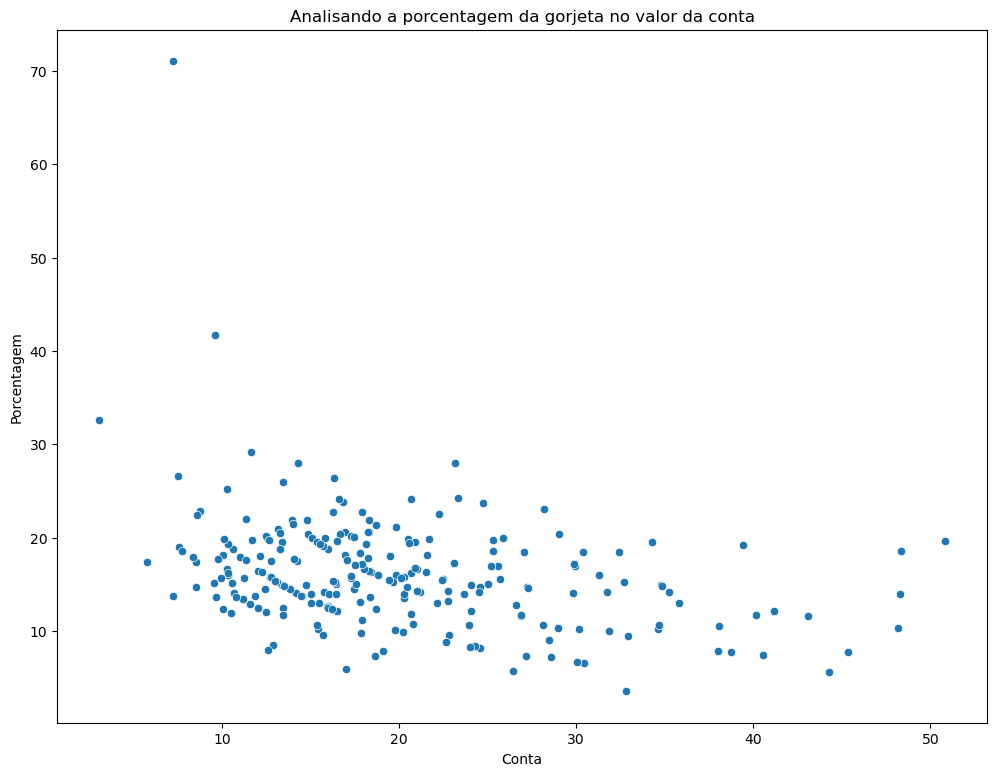

In [53]:
porcentagem_conta = sns.scatterplot(x='Conta', y='Porcentagem', data=dados)
porcentagem_conta.set_title('Analisando a porcentagem da gorjeta no valor da conta')
porcentagem_conta.figure.set_size_inches(12, 9)
porcentagem_conta=porcentagem_conta

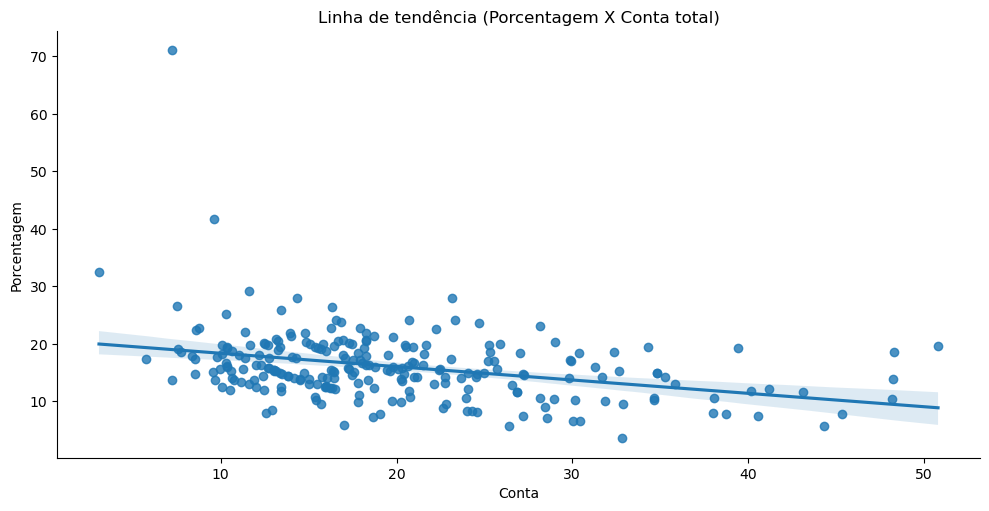

In [17]:
ax = sns.lmplot(x='Conta', y='Porcentagem', data=dados, aspect=2)
plt.title('Linha de tendência (Porcentagem X Conta total)')
ax=ax

Com a apresentação da linha de tendência, relacionado a porcentagem da gorjeta, presente no valor total da conta, fica claro que a gorjeta não é proporcional. Mesmo que o valor dado, aumenta com o valor da conta, a proporção é maior para valores mais baixos.

## Análise da sobremesa

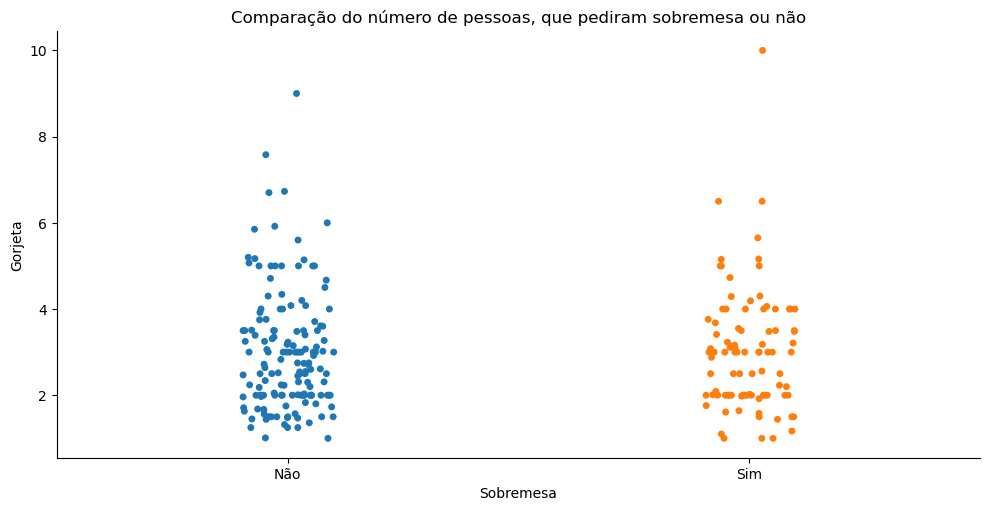

In [18]:
ax = sns.catplot(x='Sobremesa', y='Gorjeta', data=dados, aspect=2)
plt.title('Comparação do número de pessoas, que pediram sobremesa ou não')
ax=ax

In [19]:
print(dados.query('Sobremesa == "Sim"').Gorjeta.max())
print(dados.query('Sobremesa == "Não"').Gorjeta.max())

10.0
9.0


É possível observar que o maior valor de gorjeta foi dado, por alguém que pediu sobremesa. O valor foi de 10 dolares, enquanto a maior gorjeta dada por alguém que não pediu sobremesa, foi de 9 dolares.

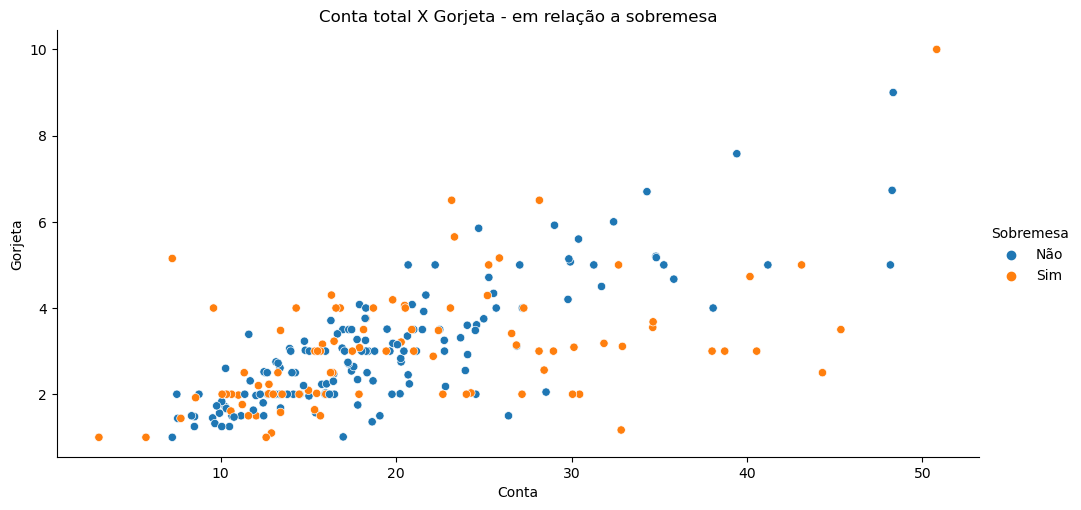

In [20]:
ax = sns.relplot(x='Conta', y='Gorjeta', hue='Sobremesa', data=dados, aspect=2)
plt.title('Conta total X Gorjeta - em relação a sobremesa')
ax=ax

Os pontos relacionados ao não pedido de sobremesa, apresentam um comportamento mais linear, em relação aos pontos referentes ao pedido de sobremesa, que apresentam mais espaçamento e sem linearidade.

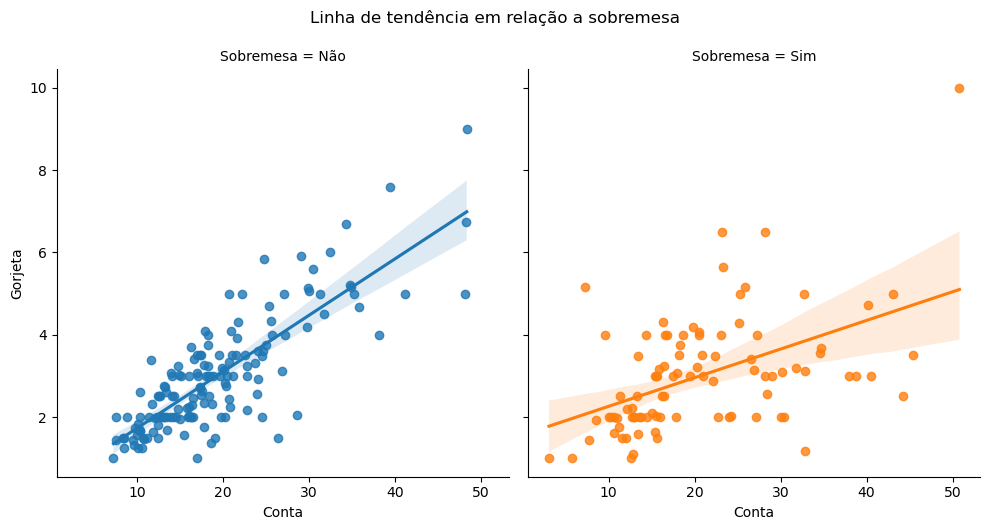

In [21]:
ax = sns.lmplot(x='Conta', y='Gorjeta', hue='Sobremesa', data=dados, aspect=1, col='Sobremesa')
plt.suptitle('Linha de tendência em relação a sobremesa', y=1.05)
ax=ax

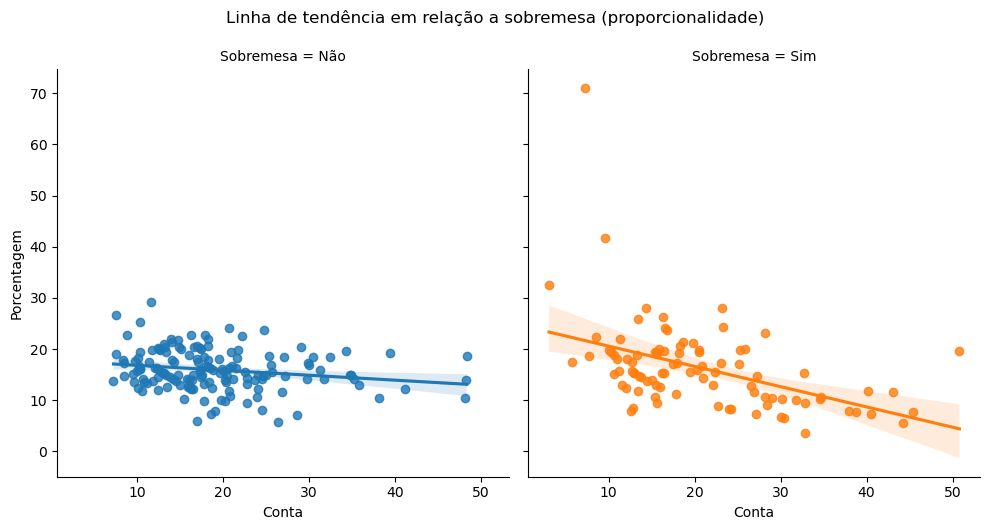

In [22]:
ax = sns.lmplot(x='Conta', y='Porcentagem', hue='Sobremesa', col='Sobremesa', data=dados)
plt.suptitle('Linha de tendência em relação a sobremesa (proporcionalidade)', y=1.05)
ax=ax

In [23]:
media_sobremesa = dados.query('Sobremesa == "Sim"').Conta.mean()
media_nao_sobremesa = dados.query('Sobremesa == "Não"').Conta.mean()

In [24]:
print(f'Valor médio da conta para clientes que pedem sobremesa: {media_sobremesa:.2f}')
print(f'Valor médio da conta para clientes que não pedem sobremesa: {media_nao_sobremesa:.2f}')

Valor médio da conta para clientes que pedem sobremesa: 20.76
Valor médio da conta para clientes que não pedem sobremesa: 19.19


A porcentagem da gorjeta, não altera com o valor da conta, para os clientes que não pedem sobremesa. É possível observar isso, com a linha horizontal do gráfico. Para os clientes que pedem sobremesa, a porcentagem de gorjeta cai de 25% para aproximadamente 10%, conforme o valor da conta aumenta. A explicação mais plausível, é que o cliente compensa ou descompensa a falta ou não da sobremesa, na gorjeta do garçom. Uma análise estatistica será feita para análisar essa possibilidade.

# Teste de hipótese - Valor médio da conta (sobremesa)

## H0 → O valor médio da conta é igual para quem pede sobremesa e para quem não pede sobremesa

## H1 → O valor médio da conta não é igual para quem pede sobremesa e para quem não pede sobremesa

In [25]:
r = ranksums(media_sobremesa, media_nao_sobremesa)
significancia = 0.05

In [26]:
if r.pvalue <= significancia:
    print('O valor médio da conta não é igual para quem pede sobremesa e para quem não pede sobremesa!')
else:
    print('O valor médio da conta é igual para quem pede sobremesa e para quem não pede sobremesa!')

O valor médio da conta é igual para quem pede sobremesa e para quem não pede sobremesa!


# Teste de hipótese - Distribuição de gorjeta (sobremesa)

## H0 → A distribuição da  taxa de gorjeta é a mesma nos dois grupos

## H1 → A distribuição da taxa de gorjeta não é a mesma nos dois grupos

In [27]:
sobremesa = dados.query('Sobremesa == "Sim"').Porcentagem
nao_sobremesa = dados.query('Sobremesa == "Não"').Porcentagem

In [28]:
r = ranksums(sobremesa, nao_sobremesa)

In [29]:
if r.pvalue <= significancia:
    print('A distribuição da taxa de gorjeta não é a mesma nos dois grupos!')
else:
    print('A distribuição da taxa de gorjeta é a mesma nos dois grupos')

A distribuição da taxa de gorjeta é a mesma nos dois grupos


# Análise - Dias da semana

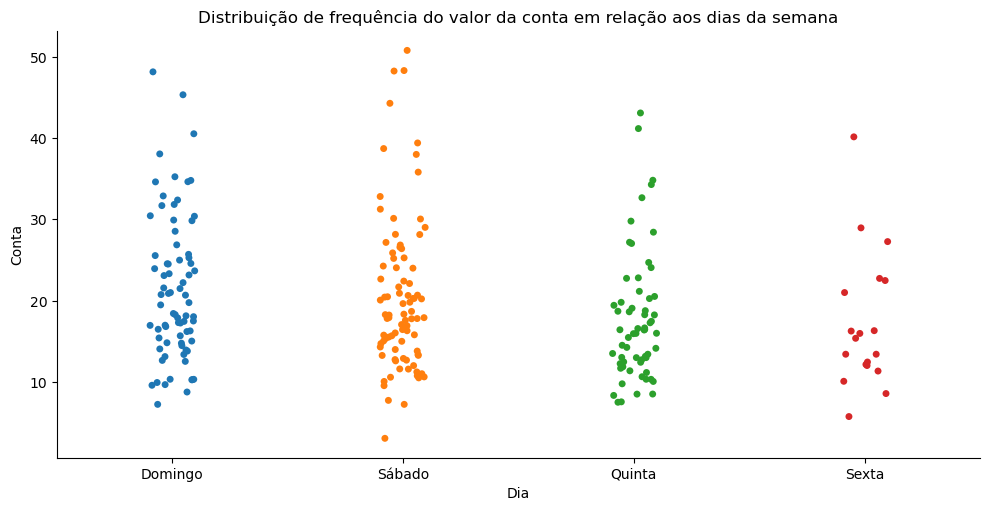

In [30]:
ax = sns.catplot(x='Dia', y='Conta', data=dados, aspect=2)
plt.title('Distribuição de frequência do valor da conta em relação aos dias da semana')
ax=ax

In [31]:
print('Domingo → R$', dados.query('Dia == "Domingo"').Conta.max())
print('Sábado → R$', dados.query('Dia == "Sábado"').Conta.max())
print('Quinta → R$', dados.query('Dia == "Quinta"').Conta.max())
print('Sexta → R$', dados.query('Dia == "Sexta"').Conta.max())

Domingo → R$ 48.17
Sábado → R$ 50.81
Quinta → R$ 43.11
Sexta → R$ 40.17


Os maiores valores de venda são do sábado e do domingo, enquanto os menores valores de venda são da quinta e da sexta.

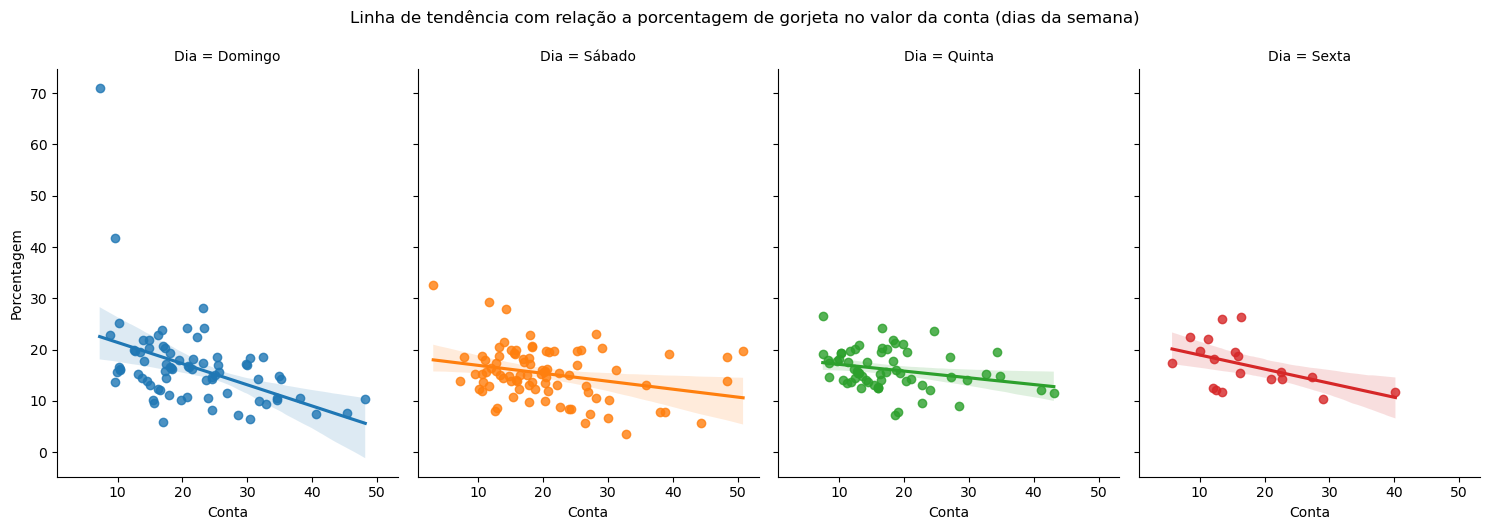

In [32]:
ax = sns.lmplot(x='Conta', y='Porcentagem', hue='Dia', data=dados, col='Dia', aspect=0.75)
plt.suptitle('Linha de tendência com relação a porcentagem de gorjeta no valor da conta (dias da semana)', y=1.05)
ax=ax

Para todos os dias, as porcentagens caem conforme o valor da conta aumenta. Os dias que a linha de tendência apresenta maior inclinação, são o domingo e a sexta.

In [33]:
media_geral_gorjetas = dados.Gorjeta.mean()
print(f'A média geral das gorjetas é {media_geral_gorjetas:.2f}')

A média geral das gorjetas é 3.00


In [34]:
dados.groupby('Dia').mean()[['Conta', 'Gorjeta', 'Porcentagem']].round(2)

,Conta,Gorjeta,Porcentagem
Dia,,,
Domingo,21.41,3.26,16.69
Quinta,17.68,2.77,16.13
Sexta,17.15,2.73,16.99
Sábado,20.44,2.99,15.31


In [35]:
print('Frequência de clientes para cada dia:')
dados.Dia.value_counts()

Frequência de clientes para cada dia:


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: Dia, dtype: int64

Domingo é o dia com a maior média de gorjetas, e a maior média do valor da conta. Sábado, apesar de ser o dia mais cheio do restaurante, apresenta a menor porcentagem de gorjeta, enquanto sexta, que é o dia com menor movimento, apresenta a maior taxa de gorjeta. Uma explicação possível, é que com uma quantidade menor de clientes, o garçom pode desempenhar seu trabalho com melhor qualidade, por ter mais tempo para atender cada mesa. Um teste estatistico será feito para averiguar se a distribuição do valor da conta, para sábado e domingo são iguais ou diferentes.

# Teste de hipótese - Distribuição do valor da conta em relação aos dias de sábado e domingo

## H0 → A distribuição do valor da conta é igual para o sábado e o domingo

## H1 → A distribuição do valor da conta não é igual para o sábado e o domingo

In [36]:
valor_conta_domingo = dados.query('Dia == "Domingo"').Conta
valor_conta_sabado = dados.query('Dia == "Sábado"').Conta

In [37]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

In [38]:
if r2.pvalue <= significancia:
    print('A distribuição do valor da conta não é a mesma para o sábado e o domingo!')
else:
    print('A distribuição do valor da conta é a mesma para o sábado e o domingo!')

A distribuição do valor da conta é a mesma para o sábado e o domingo!


# Análise - Hora do dia

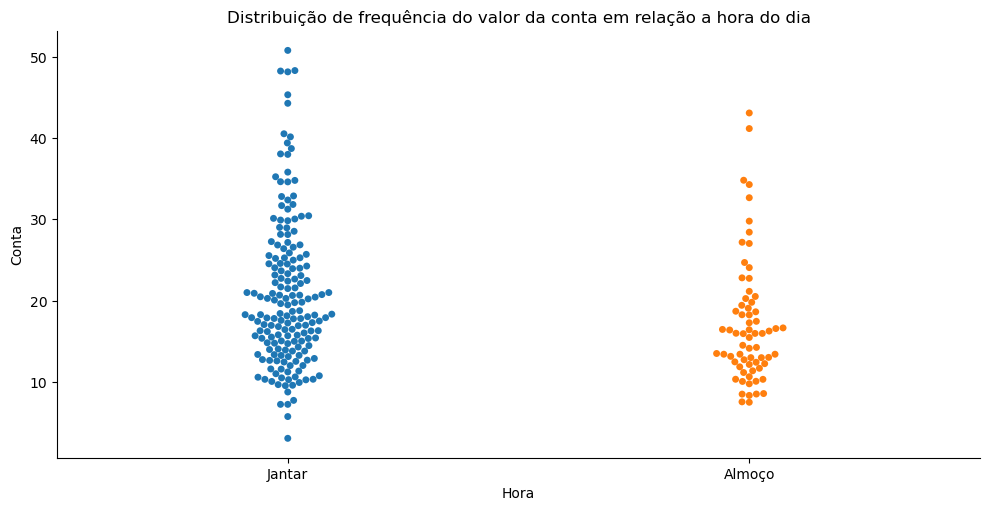

In [39]:
ax = sns.catplot(x='Hora', y='Conta', data=dados, aspect=2, kind='swarm')
plt.title('Distribuição de frequência do valor da conta em relação a hora do dia')
ax=ax

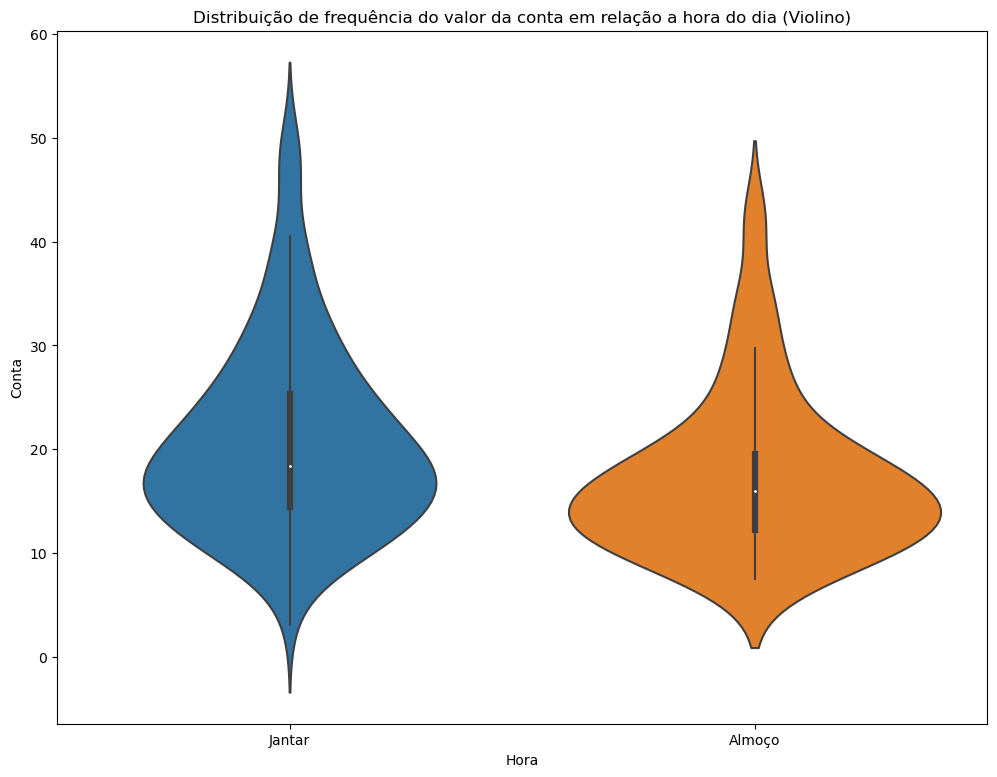

In [54]:
ax = sns.violinplot(x='Hora', y='Conta', data=dados)
plt.title('Distribuição de frequência do valor da conta em relação a hora do dia (Violino)')
ax.figure.set_size_inches(12, 9)
ax=ax

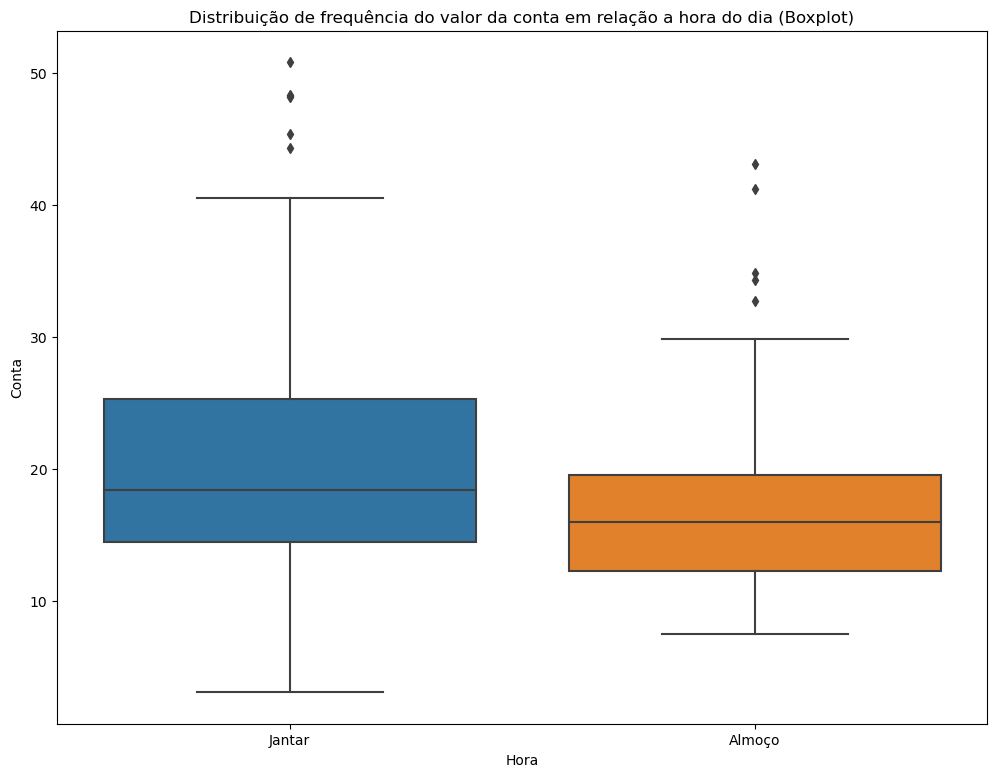

In [55]:
ax = sns.boxplot(x='Hora', y='Conta', data=dados)
plt.title('Distribuição de frequência do valor da conta em relação a hora do dia (Boxplot)')
ax.figure.set_size_inches(12, 9)
ax=ax

Com base nos gráficos, é possível afirmar, que o valor da conta no jantar, em torno 20 dolares, é superior em relação ao almoço, em torno de 15 dolares.

In [42]:
almoco = dados.query('Hora == "Almoço"').Conta
jantar = dados.query('Hora == "Jantar"').Conta

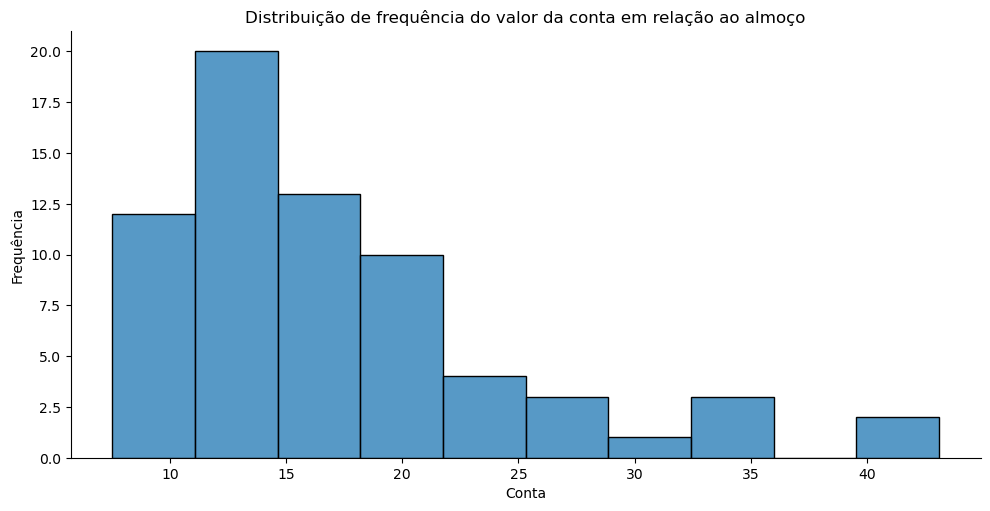

In [43]:
ax = sns.displot(almoco, aspect=2)
plt.title('Distribuição de frequência do valor da conta em relação ao almoço')
ax.set_ylabels('Frequência')
ax=ax

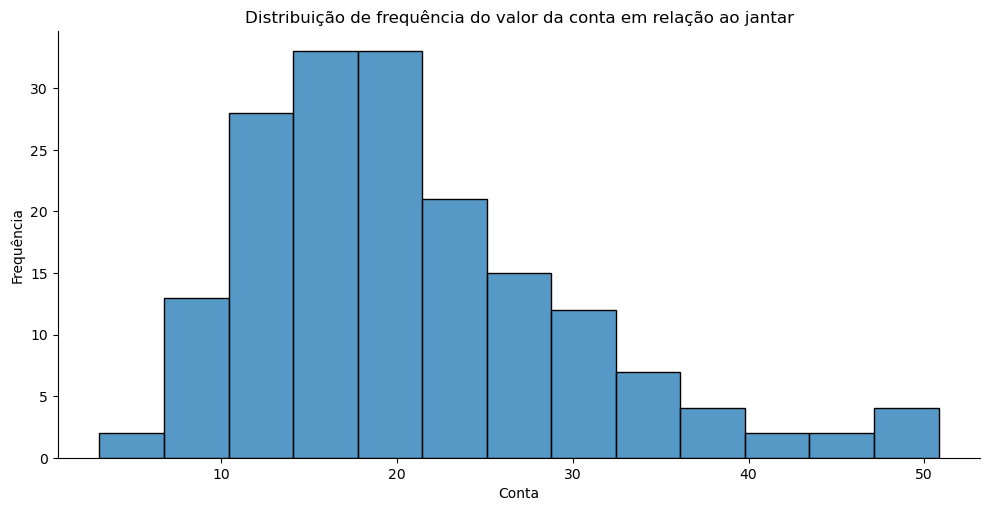

In [44]:
ax = sns.displot(jantar, aspect=2)
plt.title('Distribuição de frequência do valor da conta em relação ao jantar')
ax.set_ylabels('Frequência')
ax=ax

Para o gráfico do almoço, há uma maior frequência para o valor de 10 a 15 dolares, enquanto para o periodo do jantar, entre 15 a 20 dolares.

In [45]:
dados.groupby('Hora').mean()[['Conta', 'Gorjeta', 'Porcentagem']].round(2)

,Conta,Gorjeta,Porcentagem
Hora,,,
Almoço,17.17,2.73,16.41
Jantar,20.80,3.10,15.95


In [46]:
almoco_sobremesa = dados.query('Hora == "Almoço" & Sobremesa == "Sim"')
jantar_sobremesa = dados.query('Hora == "Jantar" & Sobremesa == "Sim"')

In [47]:
print(f'No almoço, {len(almoco_sobremesa)} pessoas pediram sobremesa')
print(f'No jantar, {len(jantar_sobremesa)} pessoas pediram sobremesa')

No almoço, 23 pessoas pediram sobremesa
No jantar, 70 pessoas pediram sobremesa


É possível reconfirmar, que o valor médio da conta no jantar é superior ao almoço, assim como a gorjeta. No entanto, a porcentagem de gorjeta no almoço é maior. Uma possível explicação, é que no almoço, os clientes tendem a estar com mais pressa, devido ao trabalho, ou compromissos do dia-a-dia, enquanto na janta, há uma liberdade maior de tempo, possibilitando a permanência no restaurante por um periodo maior, o que leva a mais gastos no resturante. Isso é comprovado pelo número de sobremesas pedidas nos dois periodos, 70 na hora do jantar e 23 na hora do almoço.

# Teste de hipótese

## H0 → A distribuição da taxa do valor da conta é igual para o almoço e o jantar

## H1 → A distribuição da taxa do valor da conta não é igual para o almoço e o jantar

In [48]:
r3 = ranksums(jantar, almoco)

In [49]:
if r3.pvalue <= significancia:
    print('A distribuição do valor da conta não é a mesma para o almoço e o jantar!')
else:
    print('A distribuição do valor da conta é a mesma para o almoço e o jantar!')

A distribuição do valor da conta não é a mesma para o almoço e o jantar!


## H0 →  A distribuição da taxa de gorjeta é igual para o almoço e o jantar

## H1 → A distribuição da taxa de gorjeta não é igual para o almoço e o jantar

In [50]:
porcentagem_almoco = dados.query('Hora == "Almoço"').Porcentagem
porcentagem_janta = dados.query('Hora == "Jantar"').Porcentagem

In [51]:
r4 = ranksums(porcentagem_almoco, porcentagem_janta)

In [52]:
if r4.pvalue <= significancia:
    print('A distribuição da taxa de gorjeta não é a mesma para o almoço e o jantar!')
else:
    print('A distribuição da taxa de gorjeta é a mesma para o almoço e o jantar!')

A distribuição da taxa de gorjeta é a mesma para o almoço e o jantar!
